<a href="https://colab.research.google.com/github/gianclbal/ml_microbiome_based_cancer_prediction/blob/master/01_loading_preparing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to Cancer Type Classification using Microbiome Data with Machine Learning**

## **About this series**
The objective of this series is to showcase what are some of the new machine learning techniques that you will learn from CSC 9008. It is an example of what a machine learning project could look like. This series is built around the paper "Machine learning-based approaches for cancer prediction using microbiome data" by Pedro Freitas, et al. The paper explores the association of microbiome composition and cancer type. It answers the question, "Can we use machine learning to predict cancer type using microbiome data?"

<break> We will use Random Forest as our main classification algorithm, but along the way we will learn new techniques including how we can get a more accurate evaluation performance of our model and how we can create new features to increase our model performance. We will conduct what's called a "one versus all" approach, a multi-class classification approach that can help deal with 2+ classes. In this work, the microbial data was obtained at the genus level. The database, linked below, provides its information in two different but complementary datasets - the microbial dataset and the metadata dataset.


**Publication**: https://www.nature.com/articles/s41598-023-38670-0.

**Data details**: The data used in the paper and in this notebook can be found at The Cancer Microbiome Atlas at https://tcma.pratt.duke.edu.

**Author of notebook**: Gian Carlo L. Baldonado

### ***Objectives of this notebook***:
* Showcase data manipulation using Pandas and exploratory data analysis

Without further ado, let's begin!

## **1) Importing packages**

The code below will import the packages needed to load and pre-process the data before we can use them for our models.

In [ ]:
import pandas as pd
import os

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## **2) Loading the datasets**

**a) Bacteria Genus Relative Abundance.txt**: Provides the unique sample of bacteria and the relative abundance of the respective genus in a given patient sample.

**b) Sample Metadata.txt**: Provides the metadata of the unique patient sample and information on sample type, cancer type and corresponding TCGA project.

Running the code below will give us a view of what the raw dataset looks like.

In [ ]:
bacteria_genus_df = pd.read_csv("https://raw.githubusercontent.com/gianclbal/ml_microbiome_based_cancer_prediction/master/dataset/Bacteria%20Genus%20Relative%20Abundance.txt", delimiter='\t')
meta_df = pd.read_csv("https://raw.githubusercontent.com/gianclbal/ml_microbiome_based_cancer_prediction/master/dataset/Sample%20Metadata.txt", delimiter="\t")

In [ ]:
print(bacteria_genus_df.shape)
bacteria_genus_df.head()

(221, 621)


,name,TCGA-CG-5720-01A,TCGA-BR-4292-11A,TCGA-CN-4741-01A,TCGA-BR-6801-01A,TCGA-AA-A01P-11A,TCGA-IG-A3I8-01A,TCGA-L5-A4OT-01A,TCGA-LN-A49X-01A,TCGA-CR-7385-01A,...,TCGA-CV-6441-01A,TCGA-AA-A01C-01A,TCGA-D7-6526-01A,TCGA-AA-3555-01A,TCGA-CV-5977-01A,TCGA-CG-5719-01A,TCGA-CQ-5329-01A,TCGA-CQ-7068-01A,TCGA-CG-4455-01A,TCGA-AG-A020-01A
0,Simonsiella,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0
1,Treponema,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.019027,...,0.0,0.0,0.0,0.0,0.132850,0.000000,0.175564,0.33506,0.0,0.0
2,Campylobacter,0.00000,0.0,0.01047,0.0,0.0,0.000000,0.012202,0.018789,0.000000,...,0.0,0.0,0.0,0.0,0.011193,0.000000,0.000000,0.00000,0.0,0.0
3,Helicobacter,0.89505,0.0,0.00000,0.0,0.0,0.067717,0.000000,0.139036,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.106557,0.000000,0.00000,0.0,0.0
4,Paracoccus,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0


In [ ]:
print(meta_df.shape)
meta_df.head()

(620, 84)


,Unnamed: 0,case_id,Sample,biospecimen_sequence,composition,current_weight,days_to_collection,days_to_sample_procurement,freezing_method,initial_weight,...,percent_monocyte_infiltration,percent_necrosis,percent_neutrophil_infiltration,percent_normal_cells,percent_stromal_cells,percent_tumor_cells,percent_tumor_nuclei,project,ffpe_tumor_slide_submitted,HistologicalType
0,TCGA-CG-5720-01A,7c9ea4fa-4cbc-4941-945a-e531e1d48304,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.5,NaN,0.0,12.5,84.0,75.0,STAD,NO,NaN
1,TCGA-BR-4292-11A,703d3e86-32f4-44ae-bd88-c02378fc2269,STN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STAD,NaN,NaN
2,TCGA-CN-4741-01A,277b02e9-ded5-4980-845d-af53690000ac,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HNSC,NaN,SCC
3,TCGA-BR-6801-01A,24fed326-bdcf-4c20-a06e-7c1c3d6c9cc5,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,0.0,25.0,70.0,75.0,STAD,NO,NaN
4,TCGA-AA-A01P-11A,13ae9d83-a22f-451f-88bb-686051725cf3,STN,NaN,NaN,NaN,2403.0,NaN,NaN,140.0,...,9.0,NaN,0.0,100.0,NaN,0.0,NaN,COAD,NaN,NaN


## **3) Pre-process the datasets**

### **a) Bacteria Genus Relative Abundance**

In the raw dataset that we just loaded, the rows are genera and the columns are samples. Since we want to predict based on samples, we will need to transpose it such that the rows are samples and the genera are columns.

The code below will transpose the dataframe, set the first row as the column headers, and reset the index.

In [ ]:
# Transpose the dataframe
bacteria_genus_df_transposed = bacteria_genus_df.T

# # Set the first row as the column headers
bacteria_genus_df_transposed.columns = bacteria_genus_df_transposed.iloc[0]

# Drop the first row, as it's now the header
bacteria_genus_df_transposed = bacteria_genus_df_transposed[1:]

# Reset the index to default numeric index
bacteria_genus_df_transposed.reset_index(inplace=True)

# Rename "index" column to "name"
bacteria_genus_df_transposed.rename(columns={"index": "SampleID"}, inplace=True)

# Set index column name to None
bacteria_genus_df_transposed = bacteria_genus_df_transposed.rename_axis(None, axis=1)

bacteria_genus_df_transposed

,SampleID,Simonsiella,Treponema,Campylobacter,Helicobacter,Paracoccus,Comamonas,Pseudomonas,Xanthomonas,Agrobacterium,...,Merdibacter,Massilioclostridium,Criibacterium,Fournierella,Lagierella,Urmitella,Colibacter,Alterileibacterium,Negativibacillus,Duodenibacillus
0,TCGA-CG-5720-01A,0.0,0.0,0.0,0.89505,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TCGA-BR-4292-11A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TCGA-CN-4741-01A,0.0,0.0,0.01047,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TCGA-BR-6801-01A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TCGA-AA-A01P-11A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,TCGA-CG-5719-01A,0.0,0.0,0.0,0.106557,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
616,TCGA-CQ-5329-01A,0.0,0.175564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
617,TCGA-CQ-7068-01A,0.0,0.33506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,TCGA-CG-4455-01A,0.0,0.0,0.0,0.0,0.0,0.0,0.014781,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**How to read this dataset**
To read this dataset, let's take patient sample `TCGA-CG-5720-01A1` for example (index 0).
* In patient `TCGA-CG-5720-01A1`'s stool sample, 89.5% of bacteria is of the genus `Helicobacter`, and for the same patient, there is no `Simonsiella` or `Treponema`.
* For patient `TCGA-CN-4741-01A`, 1% of their stool sample bacteria are `Campylobacter`.

We are also given a list of generas that are kept in the paper. We will put this in a list object so we can filter out the unneeded generas later.

In [ ]:
genera_list = [
    'Simonsiella', 'Treponema', 'Campylobacter', 'Helicobacter',
    'Paracoccus', 'Comamonas', 'Pseudomonas', 'Xanthomonas',
    'Agrobacterium', 'Bradyrhizobium', 'Acinetobacter', 'Neisseria',
    'Eikenella', 'Citrobacter', 'Enterobacter', 'Escherichia',
    'Klebsiella', 'Shigella', 'Haemophilus', 'Bacteroides',
    'Butyrivibrio', 'Porphyromonas', 'Prevotella', 'Roseburia',
    'Fusobacterium', 'Desulfovibrio', 'Megasphaera', 'Selenomonas',
    'Capnocytophaga', 'Peptostreptococcus', 'Ruminococcus', 'Staphylococcus',
    'Streptococcus', 'Enterococcus', 'Gemella', 'Atopobium',
    'Clostridium', 'Lactobacillus', 'Actinomyces', 'Bifidobacterium',
    'Corynebacterium', 'Eubacterium', 'Propionibacterium', 'Mycobacterium',
    'Gordonia', 'Mycoplasma', 'Thermosipho', 'Gardnerella',
    'Lachnospira', 'Veillonella', 'Leptotrichia', 'Rothia',
    'Kingella', 'Phascolarctobacterium', 'Coprococcus', 'Bilophila',
    'Dialister', 'Sutterella', 'Tissierella', 'Johnsonella',
    'Catonella', 'Filifactor', 'Abiotrophia', 'Lautropia',
    'Mitsuokella', 'Chryseobacterium', 'Centipeda', 'Eggerthella',
    'Cryptobacterium', 'Pedobacter', 'Mogibacterium', 'Coprobacillus',
    'Collinsella', 'Ensifer', 'Pseudoramibacter', 'Granulicatella',
    'Bulleidia', 'Solobacterium', 'Olsenella', 'Catenibacterium',
    'Anaeroglobus', 'Peptoniphilus', 'Anaerococcus', 'Sneathia',
    'Shuttleworthia', 'Varibaculum', 'Dorea', 'Tannerella',
    'Scardovia', 'Faecalibacterium', 'Ottowia', 'Alistipes',
    'Akkermansia', 'Marvinbryantia', 'Oribacterium', 'Odoribacter',
    'Subdoligranulum', 'Parabacteroides', 'Gulbenkiania', 'Barnesiella',
    'Aggregatibacter', 'Alloscardovia', 'Adlercreutzia', 'Oscillibacter',
    'Parvimonas', 'Blautia', 'Butyricimonas', 'Paraprevotella',
    'Pyramidobacter', 'Lachnoanaerobaculum', 'Stomatobaculum', 'Eggerthia',
    'Alloprevotella', 'Lelliottia', 'Coprobacter', 'Intestinimonas',
    'Fusicatenibacter', 'Lachnoclostridium', 'Tyzzerella', 'Faecalitalea',
    'Holdemanella', 'Mageeibacillus', 'Hungatella', 'Pseudopropionibacterium',
    'Peptoanaerobacter', 'Emergencia', 'Prevotellamassilia', 'Criibacterium',
    'Fournierella', 'Negativibacillus', 'Duodenibacillus'
]

### **b) Sample Metadata**

The raw dataset for the Sample Metadata doesn't need to be transposed. This dataset holds the information for our target variable, the "project" columns, which we will renamed to "label".

The code below simply renames the "Unnamed: 0" column to "name" to match the other dataset.

In [ ]:
meta_df.rename(columns={"Sample": "SampleSite"}, inplace=True) # primary tumor or normal tissue
meta_df.rename(columns={"Unnamed: 0": "SampleID"}, inplace=True)
meta_df

,SampleID,case_id,SampleSite,biospecimen_sequence,composition,current_weight,days_to_collection,days_to_sample_procurement,freezing_method,initial_weight,...,percent_monocyte_infiltration,percent_necrosis,percent_neutrophil_infiltration,percent_normal_cells,percent_stromal_cells,percent_tumor_cells,percent_tumor_nuclei,project,ffpe_tumor_slide_submitted,HistologicalType
0,TCGA-CG-5720-01A,7c9ea4fa-4cbc-4941-945a-e531e1d48304,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.5,NaN,0.0,12.5,84.0,75.0,STAD,NO,NaN
1,TCGA-BR-4292-11A,703d3e86-32f4-44ae-bd88-c02378fc2269,STN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STAD,NaN,NaN
2,TCGA-CN-4741-01A,277b02e9-ded5-4980-845d-af53690000ac,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HNSC,NaN,SCC
3,TCGA-BR-6801-01A,24fed326-bdcf-4c20-a06e-7c1c3d6c9cc5,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,0.0,25.0,70.0,75.0,STAD,NO,NaN
4,TCGA-AA-A01P-11A,13ae9d83-a22f-451f-88bb-686051725cf3,STN,NaN,NaN,NaN,2403.0,NaN,NaN,140.0,...,9.0,NaN,0.0,100.0,NaN,0.0,NaN,COAD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,TCGA-CG-5719-01A,263f67e0-0a28-42e6-b3f3-1ddd0d397220,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,20.0,80.0,70.0,STAD,NO,NaN
616,TCGA-CQ-5329-01A,02dcc11f-4f0e-4c9e-8d96-d22d47beef5d,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HNSC,NaN,SCC
617,TCGA-CQ-7068-01A,8ebe8c25-5ef9-42d4-9414-8313227b673f,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HNSC,NaN,SCC
618,TCGA-CG-4455-01A,8a173d98-20a1-4c84-86c1-97818e1c665a,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,5.0,95.0,82.5,STAD,NO,NaN


**How to read this dataframe**: The metadata dataset includes the information of whether cancer was detected or not on the patient, and if detected what kind of cancer. You can find the type of cancer a patient has under the `meta_df["project"]`. Because the aim of the project is to identify what type of cancer a patient has based on the bacteria in their gut, our labels for this classification task is the type of cancer. The following are the labels acronyms and their meanings:
* HNSC (Head and neck cancer)
* STAD (Stomach cancer)
* COAD (Colon cancer)
* ESCA (Esophageal cancer)
* READ (Rectal cancer).

Knowing what the names mean make it not so surprising that we can predict colon cancer best (because we are looking at bacteria in the colon!).

Let's now put together both datasets in one frame. It's a good practice to make a copy of the original usable dataframe so that we have it handy.

In [ ]:
# Make a copy
df = bacteria_genus_df_transposed.copy()

# Make a column in df called "Sample" and populate it with the sample names
df["SampleSite"] = meta_df["SampleSite"].to_list()

# Make a column in df called "label" and populate it with the project labels
df["label"] = meta_df["project"].to_list()

# We're only keeping all PT samples. Non-PT means that cancer was not detected and is outside the scope of the project that is about cancer type classification.
df = df[df["SampleSite"] == "PT"].reset_index(drop=True)

# Drop column SampleSite
df = df.drop(['SampleSite'], axis=1)

In [ ]:
# Drop columns where all values are 0 (none of these genera present)
df = df.loc[:, (df != 0).any(axis=0)]
df.shape

(512, 133)

In [ ]:
# Check lists are the same
set(df.columns[1:-1]).symmetric_difference(genera_list)

set()

In [ ]:
df.head()

,SampleID,Simonsiella,Treponema,Campylobacter,Helicobacter,Paracoccus,Comamonas,Pseudomonas,Xanthomonas,Agrobacterium,...,Hungatella,Pseudopropionibacterium,Peptoanaerobacter,Emergencia,Prevotellamassilia,Criibacterium,Fournierella,Negativibacillus,Duodenibacillus,label
0,TCGA-CG-5720-01A,0.0,0.0,0.0,0.89505,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,STAD
1,TCGA-CN-4741-01A,0.0,0.0,0.01047,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HNSC
2,TCGA-BR-6801-01A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,STAD
3,TCGA-IG-A3I8-01A,0.0,0.0,0.0,0.067717,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ESCA
4,TCGA-L5-A4OT-01A,0.0,0.0,0.012202,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ESCA


In [ ]:
# Save file
os.makedirs("./dataset/microbiome_preprocessed_files/", exist_ok=True)

path = "./dataset/microbiome_preprocessed_files/"
df.to_csv(path+"microbiome_merged_dfs.csv", index=False)

In [46]:
# if using colab mount google drive and save microbiome_merged_dfs.csv in your drive

# from google.colab import drive
# drive.mount('/content/drive')

We should end up with a dataframe with 512 bacteria datapoints, and 133 genera features.

In [ ]:
# Check
df.shape

(512, 133)

## **4) Exploratory Data Analysis**

The Exploratory Data Analysis step is where you will get to learn more about your datasets. In many ways, this is a powerful and important step because it can give you hints as to how your models will perform, what features will be important for the models, and how much data you have per class.

(array([127.,   0., 155.,   0.,   0.,  60.,   0., 125.,   0.,  45.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

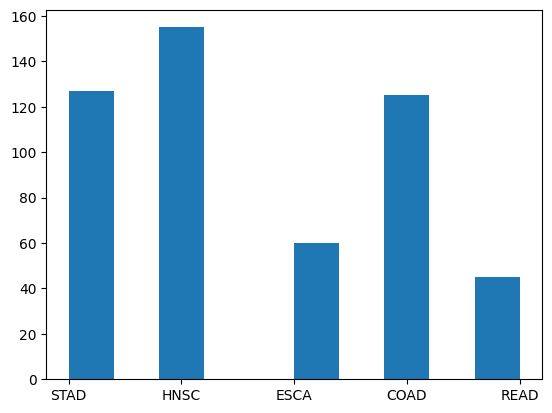

In [ ]:
# Show the counts for each class, also known as the  class distribution
plt.hist(df['label'])

**Hypothesis from data analysis**

Again, EDA is important because it can inform your hypotheses. From the visualization above, there are more datapoints with STAD, HNSC, and COAD, and not many labels for ESCA and READ. We can hypothesize from this visual that models that classification models that focus on identifying READ or ESCA will perform worst than the other classes because there's less data for the models to learn.

We can also visualize the distribution of the relative abundance of respective genera. For example below, we are visualizing Helicobacter across all classes.

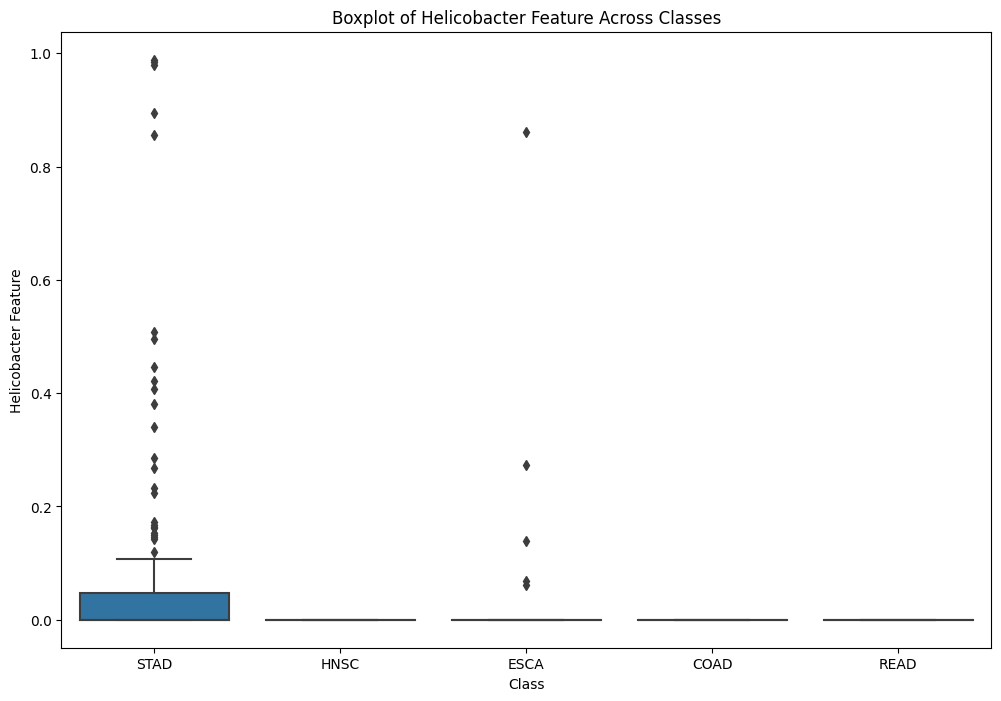

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['label'], y=df['Helicobacter'])
plt.title('Boxplot of Helicobacter Feature Across Classes')
plt.xlabel('Class')
plt.ylabel('Helicobacter Feature')
plt.show()

This box plot tells us that for the genus Helicobacter, it seems to only exists for STAD and ESCA samples, and that majority of the relative abundance of Helicobacter for STAD samples are below 0.1, meaning they exist in STAD samples, but they're not the majority.

## Task 1:
Pick another feature to visualize as a box plot from the `genera_list` and write what you observe from the visualization. For example, you can pick "Porphyromonas" or "Fusobacterium."

In [ ]:
# Write your code here


**Your observation and analysis**:

## Task 2:

Open ended response: Why is it crucial to examine the distribution of features in a dataset before diving into machine learning tasks?

**Your answer**:

Now that the our data is ready, we will learn how we can use it in different classification approaches. In the next notebook, we will learn about one vs all classification, a technique you can use to handle multiple class classification.